# Income Distribution

Predict the income class of US population.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
plt.style.use('seaborn')

In [2]:
data = pd.read_csv('data/train.csv')
data.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


In [3]:
data['income_level'] = data['income_level'].map({-50000: 0, 50000: 1})

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 41 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   age                               199523 non-null  int64 
 1   class_of_worker                   199523 non-null  object
 2   industry_code                     199523 non-null  int64 
 3   occupation_code                   199523 non-null  int64 
 4   education                         199523 non-null  object
 5   wage_per_hour                     199523 non-null  int64 
 6   enrolled_in_edu_inst_lastwk       199523 non-null  object
 7   marital_status                    199523 non-null  object
 8   major_industry_code               199523 non-null  object
 9   major_occupation_code             199523 non-null  object
 10  race                              199523 non-null  object
 11  hispanic_origin                   198649 non-null  object
 12  se

## Data Exploration

We start by create visualizations and try to find trends that can be used for analysis.

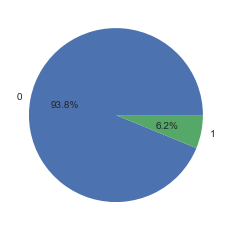

In [5]:
label_0 = len(data.loc[data['income_level'] == 0])
label_1 = len(data.loc[data['income_level'] == 1])

sizes = [(label_0 / len(data['income_level'])*100), (label_1 / len(data['income_level'])*100)]
labels = '0', '1'
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

From the pie chart we can see that for the dependent variable, around 94% of the people make less than 50,000 dollars per year. Since the majority class has 94% proportion, the data is inbalanced. Therefore, the key to creating an accurate model would depend on how well we can predict the minority class.

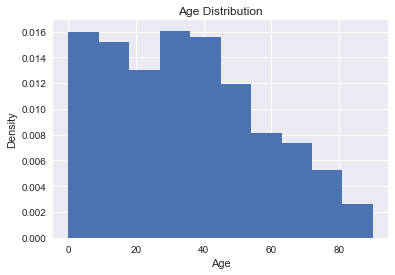

In [6]:
plt.hist(data['age'], density=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution')
plt.show()

The density plot shows that the data consists of people from the age of 0 to 90 years old with frequency of people declining with age. The age provides useful insight as people in their 20s to 60s are more likely to earn more than 50,000 dollars as they work. 

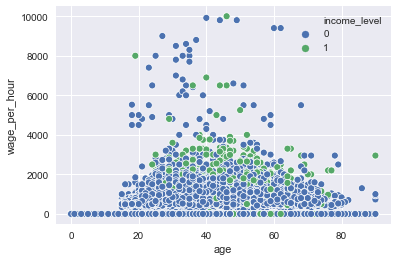

In [7]:
sns.scatterplot(x="age", y="wage_per_hour", hue="income_level", data=data)
plt.show()

The scatter plot above displays wages per hour against age. From the plot we see an interesting trend: individuals with higher wage per hour do not necessarily have an income level higher than 50,000 dollars. To dive further into this observation we look into other categories that provides us with more information on financial assets: capital gains, capital losses, and dividends from stock 

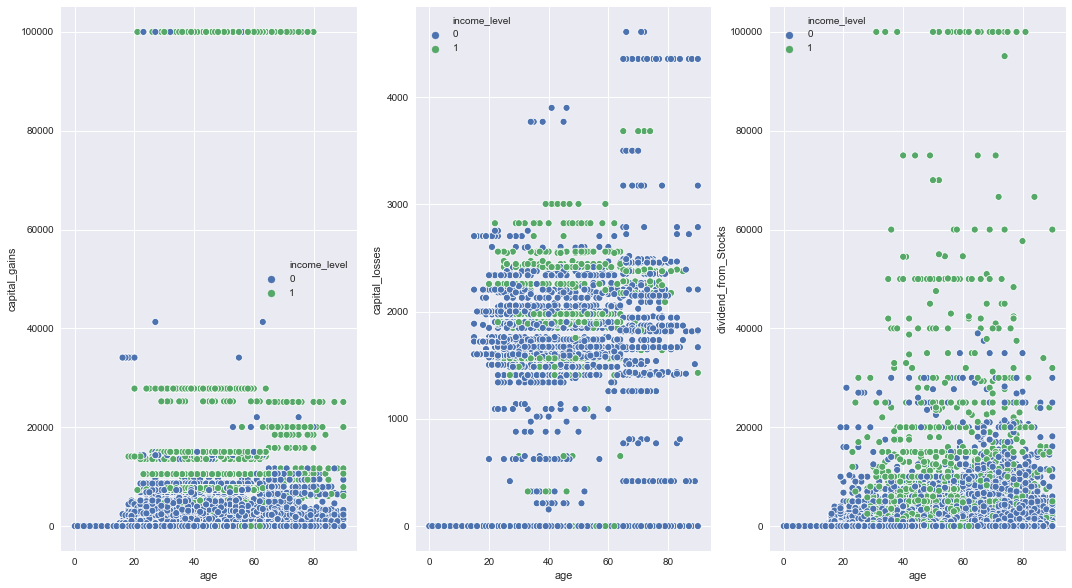

In [8]:
plt.figure(figsize=(18, 10))

plt.subplot(1, 3, 1)
sns.scatterplot(x='age', y='capital_gains', hue='income_level', data=data)

plt.subplot(1, 3, 2)
sns.scatterplot(x='age', y='capital_losses', hue='income_level', data=data)

plt.subplot(1, 3, 3)
sns.scatterplot(x='age', y='dividend_from_Stocks', hue='income_level', data=data)

plt.show()

The three scatter plots above shows us a clearer picture on individual's income level. The left plot shows that individuals with higher capital gain tend to have a higher income level. A similar observation can be made for the right plot as well. People receiving higher dividends tend to have a higher income level than those who are not receiving a high dividend. From the middle plot, which shows capital loss, we can observe that people with higher income level tend to have less capital loss compared to others. Therefore, from the three plots we can conclude that one reason to identify individual with higher income level is to observe whether they are earning from capital gain and dividends from stocks.

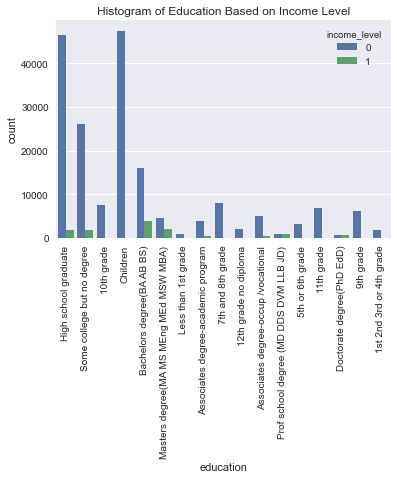

In [9]:
sns.countplot(x="education", hue="income_level", data=data)
plt.xticks(rotation=90)
plt.title('Histogram of Education Based on Income Level')
plt.show()

We also look into some categorical variables. Children and people who have not graduated high school all have income level that are lower than 50,000 dollars. We can also infer that bachelors degree holders have the largest proportion of people with higher income level. Furthermore, we can also observe that people with degrees have higher proportion of high income level than others.

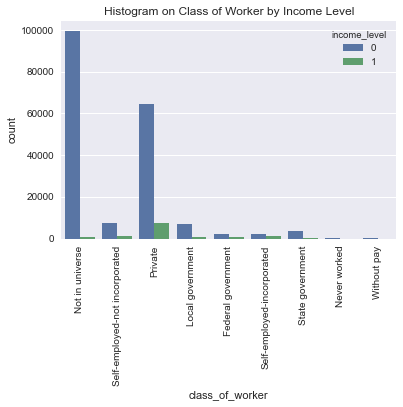

In [10]:
sns.countplot(x="class_of_worker", hue="income_level", data=data)
plt.xticks(rotation=90)
plt.title('Histogram on Class of Worker by Income Level')
plt.show()

We assume that "Not in universe" category are people who did not provide an answer. Although we can see that people working in the private sector have higher proportion with high income level, the variable is overall imbalanced. "Not in universe" and "Private" counts for more 50% of the answer. 

## Data Cleansing

For the columns `migration_msa`, `migration_reg`, `migration_within_reg`, and `migration_sunbelt` half of the rows are missing; therefore, we drop the four columns. Furthermore, for the columns `major_industry_code`, and `major_occupation_code` there are two columns `industry_code` and `occupation_code` that show similar data so we drop the two columns. Since some columns have less rows that other columns, we make the number of rows same for all columns by dropping rows with `NAN` values.

In [11]:
data.drop(columns = ['migration_msa', 'migration_reg', 'migration_within_reg', 'migration_sunbelt'], inplace=True)

# remove because of overlapping columns
data.drop(columns = ['industry_code', 'occupation_code'], inplace=True)

# drop rows with NA
data.dropna(inplace=True)

From `data_cleansing_using_R.ipynb`, we found that the variables that were statistically significant are:
- age
- class_of_worker
- education
- enrolled_in_edu_inst_lastwk
- marital_status
- major_industry_code
- major_occupation_code
- race
- hispanic_origin
- sex
- member_of_labor_union
- full_parttime_employment_stat
- capital_gains
- capital_losses
- dividend_from_Stocks
- tax_filer_status
- d_household_family_stat
- num_person_Worked_employer
- country_mother
- country_self
- business_or_self_employed
- weeks_worked_in_year

Using these columns we create a new dataframe.

In [12]:
filtered_columns = ['age', 
'class_of_worker', 
'education', 
'enrolled_in_edu_inst_lastwk',
'marital_status',
'major_industry_code',
'major_occupation_code',
'race',
'hispanic_origin',
'sex',
'member_of_labor_union',
'full_parttime_employment_stat',
'capital_gains',
'capital_losses',
'dividend_from_Stocks',
'tax_filer_status',
'd_household_family_stat',
'num_person_Worked_employer',
'country_mother',
'country_self',
'business_or_self_employed',
'weeks_worked_in_year']

filtered_data = data[filtered_columns]
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189729 entries, 0 to 199521
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   age                            189729 non-null  int64 
 1   class_of_worker                189729 non-null  object
 2   education                      189729 non-null  object
 3   enrolled_in_edu_inst_lastwk    189729 non-null  object
 4   marital_status                 189729 non-null  object
 5   major_industry_code            189729 non-null  object
 6   major_occupation_code          189729 non-null  object
 7   race                           189729 non-null  object
 8   hispanic_origin                189729 non-null  object
 9   sex                            189729 non-null  object
 10  member_of_labor_union          189729 non-null  object
 11  full_parttime_employment_stat  189729 non-null  object
 12  capital_gains                  189729 non-nu

In [15]:
filtered_data.head()

,age,class_of_worker,education,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,race,hispanic_origin,sex,...,capital_gains,capital_losses,dividend_from_Stocks,tax_filer_status,d_household_family_stat,num_person_Worked_employer,country_mother,country_self,business_or_self_employed,weeks_worked_in_year
0,73,Not in universe,High school graduate,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,...,0,0,0,Nonfiler,Other Rel 18+ ever marr not in subfamily,0,United-States,United-States,0,0
1,58,Self-employed-not incorporated,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,...,0,0,0,Head of household,Householder,1,United-States,United-States,0,52
2,18,Not in universe,10th grade,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,...,0,0,0,Nonfiler,Child 18+ never marr Not in a subfamily,0,Vietnam,Vietnam,0,0
3,9,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,...,0,0,0,Nonfiler,Child <18 never marr not in subfamily,0,United-States,United-States,0,0
4,10,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,...,0,0,0,Nonfiler,Child <18 never marr not in subfamily,0,United-States,United-States,0,0


## Creating Pipeline

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [19]:
num_columns = ['capital_gains', 'capital_losses', 'dividend_from_Stocks', 'num_person_Worked_employer', 'weeks_worked_in_year']
cat_columns = ['age', 
'class_of_worker', 
'education', 
'enrolled_in_edu_inst_lastwk',
'marital_status',
'major_industry_code',
'major_occupation_code',
'race',
'hispanic_origin',
'sex',
'member_of_labor_union',
'full_parttime_employment_stat',
'tax_filer_status',
'd_household_family_stat',
'country_mother',
'country_self',
'business_or_self_employed']

In [20]:
full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_columns),
    ("cat", OneHotEncoder(), cat_columns)
])

train_data = full_pipeline.fit_transform(filtered_data)

## Train Model

In [23]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [29]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_label_data)

In [22]:
train_label_data = data['income_level']

### Voting Classifier

In [24]:
svc_clf = SVC()
dtc_clf = DecisionTreeClassifier()
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()

In [32]:
# voting classifier
voting_clf = VotingClassifier(
    estimators=[('svc', svc_clf), ('dtc', dtc_clf), ('log', log_clf), ('rnd', rnd_clf)],
    voting = 'hard'
)

voting_clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('svc', SVC()), ('dtc', DecisionTreeClassifier()),
                             ('log', LogisticRegression()),
                             ('rnd', RandomForestClassifier())])

In [33]:
# Predict

pred = voting_clf.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, pred))

Accuracy Score: 0.9554318723251745


### XGBoost